In [7]:
# Toy Proof of Concept: Chaotic Dynamics with Reward-Based Learning
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


In [8]:
# Define Lorenz system for chaotic dynamics
def lorenz(state, t, sigma=10, beta=8/3, rho=28):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Simulate chaotic dynamics
def simulate_chaos(t, initial_state):
    return odeint(lorenz, initial_state, t)


In [9]:
# Environment setup
env_size = 10
target_position = np.array([5, 5])
obstacles = [np.array([4, 4]), np.array([6, 2])]
reward_zone_radius = 1.5

# Reward function
def reward(agent_position):
    distance_to_target = np.linalg.norm(agent_position - target_position)
    if distance_to_target <= reward_zone_radius:
        return 1  # High reward near target
    return -0.1  # Penalize being away from the target


In [10]:
# Agent initialization
agent_position = np.array([0.0, 0.0])
agent_velocity = np.array([0.0, 0.0])
learning_rate = 0.05

# Simulation parameters
time_steps = 3000
dt = 0.1
chaos_weight = 0.5  # Weight of chaotic dynamics in decision-making
chaos_decay = 0.55  # Chaos diminishes over time
chaos_state = [1.0, 1.0, 1.0]  # Initial state for chaos

# Visualization setup
trajectory = [agent_position.copy()]
reward_history = []

In [11]:

# Simulation loop
for step in range(time_steps):
    # Calculate reward
    current_reward = reward(agent_position)
    reward_history.append(current_reward)
    
    # Calculate gradient towards target
    gradient = target_position - agent_position
    gradient_norm = np.linalg.norm(gradient)
    if gradient_norm > 0:
        gradient /= gradient_norm  # Normalize gradient
    
    # Chaotic dynamics contribution
    t = np.linspace(0, dt, 10)
    chaos_state = simulate_chaos(t, chaos_state)[-1]
    chaotic_force = chaos_state[:2]  # Use x and y components
    
    # Update agent's velocity and position
    agent_velocity = learning_rate * gradient + chaos_weight * chaotic_force
    agent_position += agent_velocity * dt
    trajectory.append(agent_position.copy())
    
    # Decay chaotic contribution
    chaos_weight *= chaos_decay


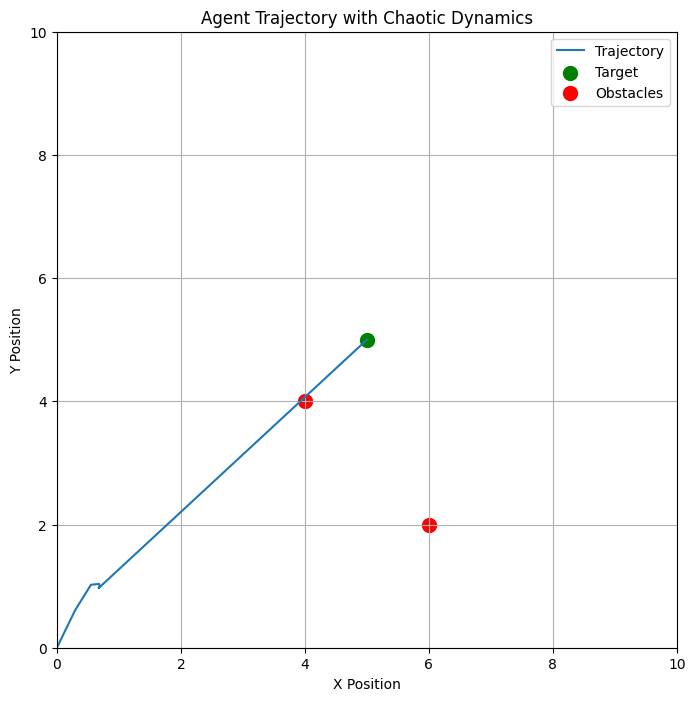

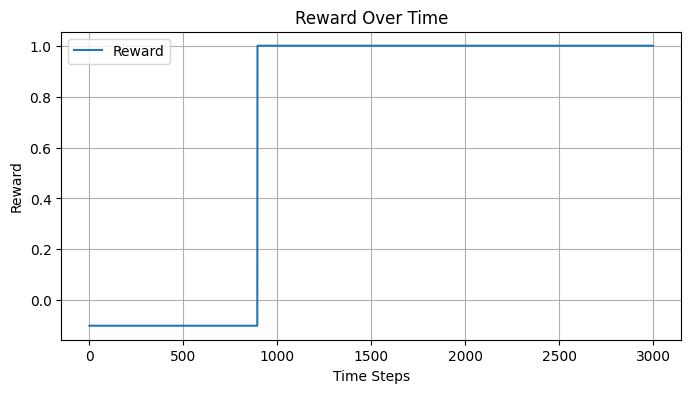

In [12]:
# Plot results
trajectory = np.array(trajectory)
plt.figure(figsize=(8, 8))
plt.plot(trajectory[:, 0], trajectory[:, 1], label="Trajectory")
plt.scatter(*target_position, color="green", label="Target", s=100)
plt.scatter(*np.array(obstacles).T, color="red", label="Obstacles", s=100)
plt.title("Agent Trajectory with Chaotic Dynamics")
plt.xlim(0, env_size)
plt.ylim(0, env_size)
plt.legend()
plt.grid()
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.show()

# Plot reward history
plt.figure(figsize=(8, 4))
plt.plot(reward_history, label="Reward")
plt.title("Reward Over Time")
plt.xlabel("Time Steps")
plt.ylabel("Reward")
plt.grid()
plt.legend()
plt.show()
